# Interior Point Methods

Let's do a simple 1D problem, just for illustration:

\begin{align}
\text{minimize} &\quad f(x) = -x\\
\text{subject to} &\quad x \le 5
\end{align}

Clearly, the answer is $x^* = 5$, but let's see how it looks like with a (simplified) interior point approach.  First, let's write our constraint in a standard constraint form $c(x) \le 0$ and form a new objective.

$$c(x) = x - 5 \le 0$$

Thus,

\begin{align}
\pi(x) &= f(x) - \mu \log(-c(x)) \\
&= -x - \mu \log(5 - x)
\end{align}

First, let's just plot the penalty portion $-\mu\log(-c(x))$, starting with the case $\mu = 1$.

(0, 5.2)

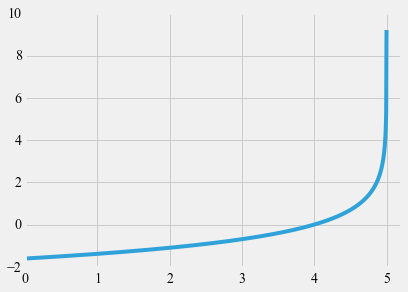

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

x = np.linspace(0, 4.9999, 1000)

plt.figure()
plt.plot(x, -np.log(5 - x))
plt.xlim([0, 5.2])

We can see that it actus like a steep wall near $x=5$ with small effect elsewhere.  The next example is interactive, letting you set a $\mu$.  Notice that as $\mu$ becomes smaller and smaller the penalty more closely represents a perfect barrier.

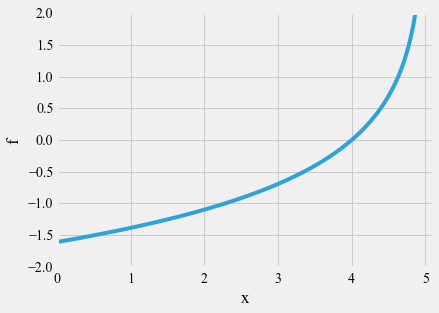

None

In [2]:
from ipywidgets import interact

@interact(mu=(0.1, 2.0, 0.1))
def logbarrier(mu):
    f = -mu*np.log(5 - x)
    plt.plot(x, f)
    plt.xlim([0, 5.1])
    plt.ylim([-2, 2])
    plt.xlabel('x')
    plt.ylabel('f')
    plt.show()

Let's now plot this objective plus the penalty, or in other words our new function to minimize.  We start with $\mu = 1.0$.  Also shown for reference is the line $f(x) = -x$ which is the objective function.  The constraint $x \le 5$ is like a wall at $x = 5$.  We see that the log function creates a barrier that approximates the wall.  As we decrease the valye of $\mu$, the barrier will increase in steepness and closer approximate the wall.

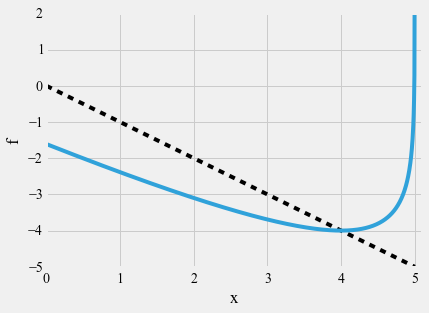

In [3]:
plt.figure()
plt.plot(x, -x, 'k--')
mu = 1.0
f = -x - mu*np.log(5 - x)
plt.plot(x, f)
plt.xlim([0, 5.1])
plt.ylim([-5, 2])
plt.xlabel('x')
plt.ylabel('f')

We can add a slider to try a range of values of $\mu$.

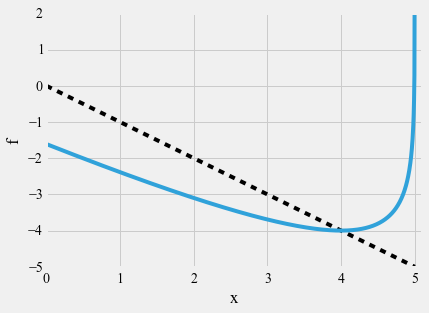

None

In [4]:
@interact(mu=(0.1, 2.0, 0.1))
def barrier(mu):
    f = -x - mu*np.log(5 - x)
    plt.plot(x, -x, 'k--')
    plt.plot(x, f)
    plt.xlim([0, 5.1])
    plt.ylim([-5, 2])
    plt.xlabel('x')
    plt.ylabel('f')
    plt.show()

For those of you viewing this statically, rather than interactively, here are a few snapshots at $\mu = 0.5, 0.25, \text{ and } 0.125$

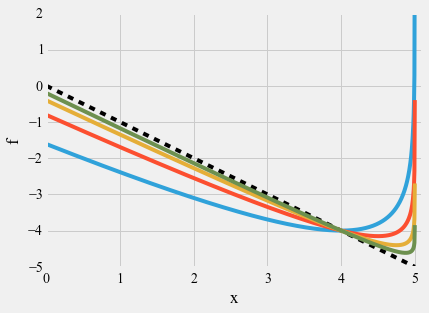

In [5]:
plt.figure()
plt.plot(x, -x, 'k--')

muvec = [1.0, 0.5, 0.25, 0.125]

for mu in muvec:

    f = -x - mu*np.log(5 - x)
    plt.plot(x, f)

plt.xlim([0, 5.1])
plt.ylim([-5, 2])
plt.xlabel('x')
plt.ylabel('f')
plt.show()